# Dominik Szot, 20.04.2023
# Laboratorium 06
# Kwadratury

# Zadanie 1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

In [2]:
f_x = lambda x : 4./(1 + x**2)

In [3]:
def rectangular_method(nodes, values) -> None:
    accumulated = 0.

    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*values[i]
    
    return accumulated


In [56]:
m = 26

a = 0
b = 1

error_trapz = [np.double(0) for i in range(m-1)]
error_simps = [np.double(0) for i in range(m-1)]
error_rectangle = [np.double(0) for i in range(m-1)]

for i in range(1, m):
    no_nodes = 2**i + 1
    quadrature_nodes = np.array([np.double(a) + np.double(i) * np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
    quadrature_points = [f_x(i) for i in quadrature_nodes]

    result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
    result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
    result_rectangle = rectangular_method(quadrature_nodes, quadrature_points);

    error_trapz[i-1]=((np.pi - result_trapz)/np.pi)
    error_simps[i-1]=((np.pi - result_simps)/np.pi)
    error_rectangle[i-1]=((np.pi - result_rectangle)/np.pi)

print(error_trapz)
print(error_simps)
print(error_rectangle)

[0.013239352830248852, 0.0033155740256952146, 0.0008289295863128951, 0.00020723296117346922, 5.180824911615532e-05, 1.2952062416862866e-05, 3.238015606336086e-06, 8.095039015840215e-07, 2.023759753606659e-07, 5.0593993804826974e-08, 1.2648498415867247e-08, 3.1621244272693295e-09, 7.905312481753182e-10, 1.9763274136483664e-10, 4.940829135969854e-11, 1.235186080294587e-11, 3.0879652007364677e-12, 7.719559606876562e-13, 1.9366044060466746e-13, 4.8344431158245456e-14, 1.2722218725854067e-14, 3.1098756885421053e-15, 2.5444437451708133e-15, 2.6858017310136362e-15, -2.6858017310136362e-15]
[0.0026290232907892, 7.647757510904547e-06, 4.8106519024246646e-08, 7.527937548427748e-10, 1.1763811581839728e-11, 1.8376538159566985e-13, 2.8271597168564595e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4135798584282297e-16, 0.0, 0.0, 0.0, 1.4135798584282297e-16, -2.8271597168564594e-16, -1.4135798584282297e-16, -4.240739575284689e-16, 1.5549378442710527e-15, 2.1203697876423446e-15]
[0.1723942959221442, 

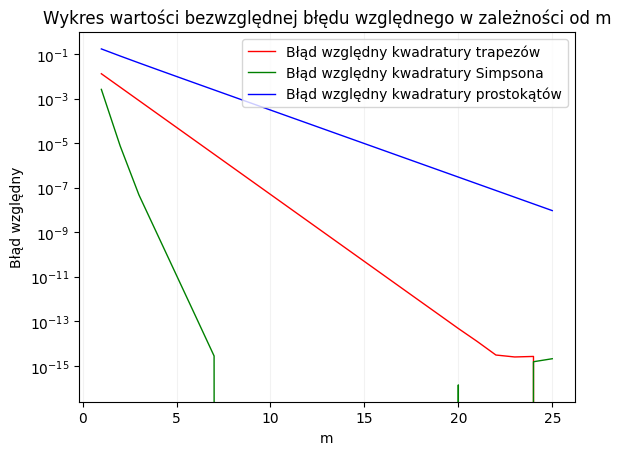

h_min kwadratury trapezów -2.6858017310136362e-15
h_min kwadratury Simpsona -4.240739575284689e-16
h_min kwadratury prostokątów 9.486442405863066e-09


In [57]:
x_no_points = [i for i in range(1, m)]

plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')


plt.title("Wykres wartości bezwzględnej błędu względnego w zależności od m")
plt.xlabel("m")
plt.ylabel("Błąd względny")
plt.legend()
plt.show()



In [64]:
h_min_t = 0
h_min_r = 0
h_min_s = 0

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_trapz[i-1] and error_trapz[i-1] > 0:
        h_min_t = error_trapz[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_rectangle[i-1] and error_rectangle[i-1] > 0:
        h_min_r = error_rectangle[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_simps[i] < error_simps[i-1] and error_simps[i-1] > 0:
        h_min_s = error_simps[i-1]
    else:
        break

print("H min T", h_min_t)
print("H min R", h_min_r)
print("H min S", h_min_s)



H min T 3.1098756885421053e-15
H min R 1.8972566473542012e-08
H min S 2.8271597168564595e-15


In [63]:
def machineEpsilon(func=float):
    machine_epsilon = func(1)
    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

print("Eps. maszynowy dla np.double: ", machineEpsilon(np.double))

Eps. maszynowy dla np.double:  2.220446049250313e-16


In [163]:
f_x_2 = lambda x : np.double(4)/(1 + x**2)

In [164]:
def gauss_l(f_x_2, a, b, n):

    nodes = np.empty(n, dtype=np.double)
    weights = np.empty(n, dtype=np.double)
    mapped_nodes = np.empty(n, dtype=np.double)
    mapped_weights = np.empty(n, dtype=np.double)
    
    nodes, weights = np.polynomial.legendre.leggauss(n)

    mapped_nodes = (b-a)/(2) * nodes + (b+a)/2
    mapped_weights = (b-a)/(2) * weights

    return np.double(sum(mapped_weights * f_x_2(mapped_nodes)))

In [165]:
f_2_values = np.array([gauss_l(f_x_2, np.double(0), np.double(1), i) for i in range(1,m+2)], dtype=np.float64)
gauss_l_errors = [np.abs((np.pi - f_2_values[i])/np.pi) for i in range(1, m+1)]

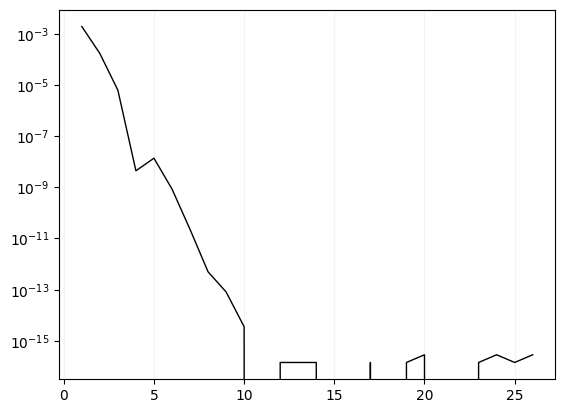

In [166]:
plt.semilogy([i for i in range(1, m+1)], gauss_l_errors, linewidth=1,  color="black", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')

plt.show()
